In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

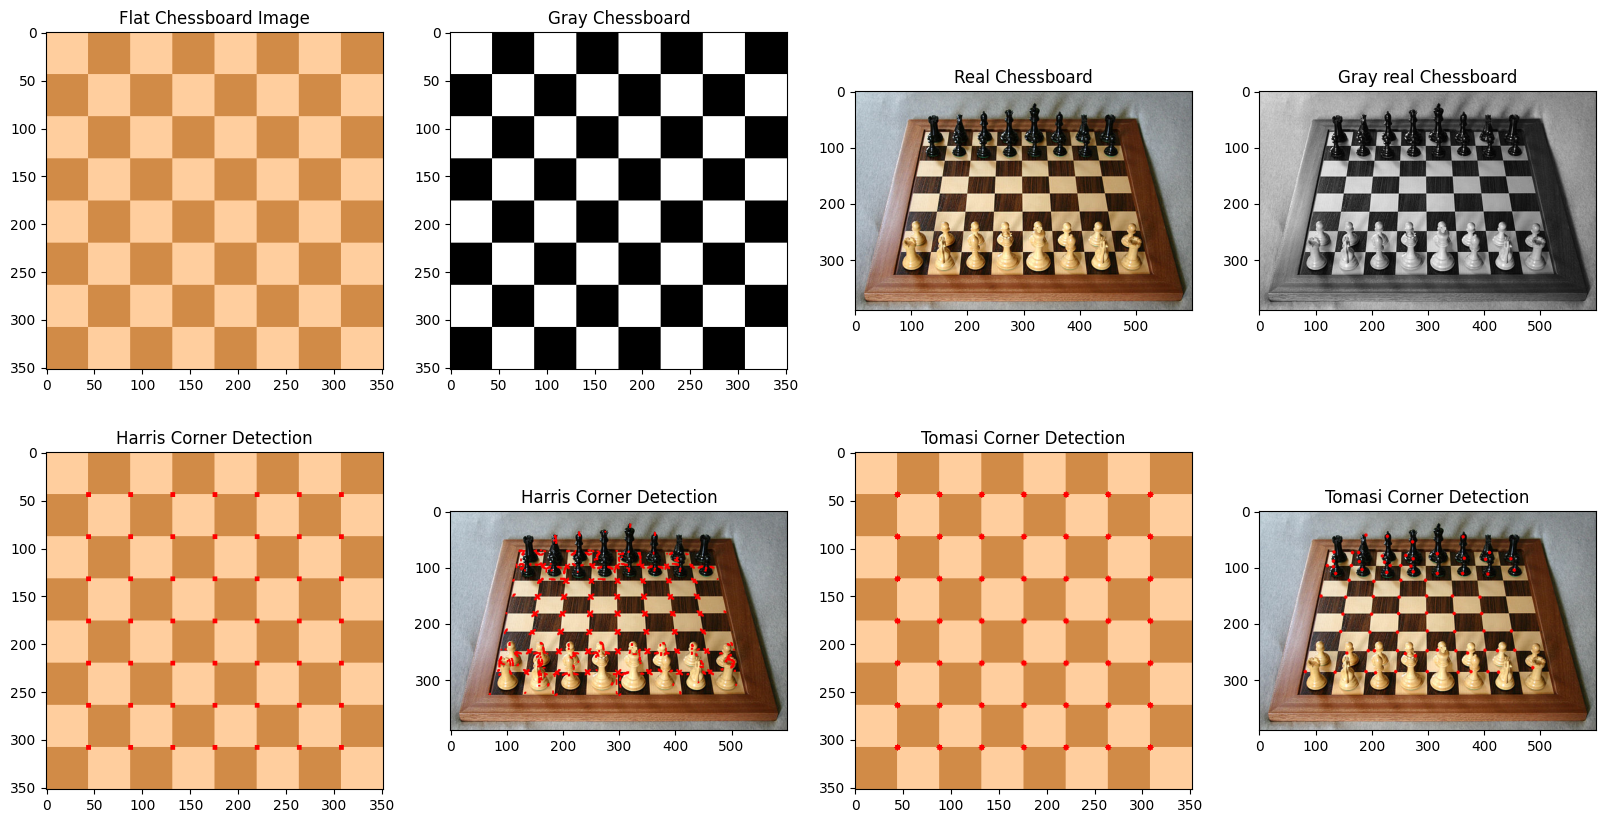

In [42]:
# Corner Detection, the junction of two edges or the internal corners of an image

# Prepare the network
fig = plt.figure(figsize=(20,10))
rows = 2
cols = 4
num = 0

def display_img(img,title, cmap=None):
    global num
    num += 1
    ax = fig.add_subplot(rows, cols, num)
    ax.imshow(img, cmap)
    ax.set_title(title)

# Load image
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
display_img(flat_chess, 'Flat Chessboard Image')

# Load image in grayscale
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
display_img(gray_flat_chess, 'Gray Chessboard','gray')

# Load Real Chessboard Image
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
display_img(real_chess, 'Real Chessboard')

# Load image in grayscale
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
display_img(gray_real_chess, 'Gray real Chessboard','gray')

# Convert int to float for Harris Corner Detection
gray_float_flat = np.float32(gray_flat_chess)

# Harris Corner Detection
dst = cv2.cornerHarris(gray_float_flat,blockSize=2, ksize=3, k=0.04)
# The result is dilated for marking the corners
dst = cv2.dilate(dst, None)
# visualization
flat_chess[dst> 0.01 * dst.max()] = [255,0,0]
display_img(flat_chess, 'Harris Corner Detection')


# Corner Harris method takes the input image in float format
gray_float_real = np.float32(gray_real_chess)
# BlockSize -----> Neighborhood size
# ksize     -----> Aperture parameter for the sobel() operator
# k         -----> Harris detector free parameter in the equation
# dst       -----> calculate R score for each window, 
#                  if R is small, then the region is flat
#                  if R is less than zero, then the region is an edge
#                  if R is large , then the region is corner
dst = cv2.cornerHarris(gray_float_real,blockSize=2,ksize=23,k=0.04)
# Dilate the output. Results are marked through the dialated corners
dst = cv2.dilate(dst,None)
# Reverting back to the original image using the optimal threshold value
real_chess[dst> 0.01 * dst.max()] = [255,0,0]
display_img(real_chess, 'Harris Corner Detection')






# Shi Tomasi corner detection

flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)
corners = np.int0(corners)
for i in corners:
    # flatten the corners
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

display_img(flat_chess,'Tomasi Corner Detection')


real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)

display_img(real_chess, 'Tomasi Corner Detection')